In [183]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy import signal # type: ignore
import numpy as np

<StemContainer object of 3 artists>

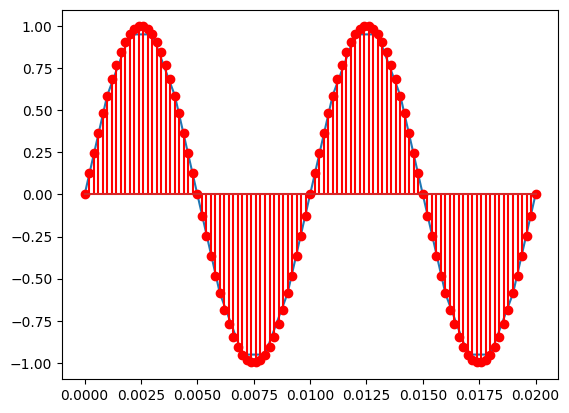

In [184]:
fm = 100
fs  = 50*fm


t = np.arange(0,0.001 + 2/fm,0.001)
ts = np.arange(0,2/fm + 1/fs,1/fs)

y = np.sin(2*np.pi*fm*t)
ys = np.sin(2*np.pi*fm*ts)
plt.plot(t,y)
plt.stem(ts,ys,'r')

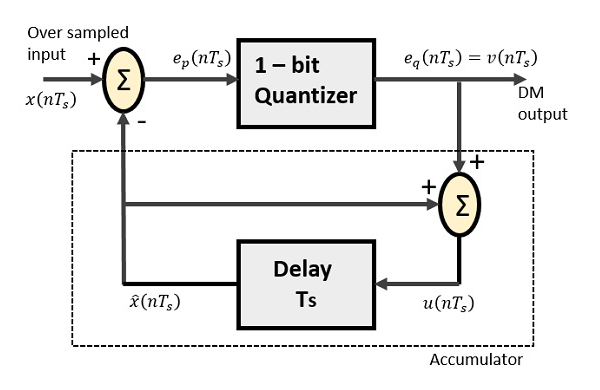

0.12566370614359174


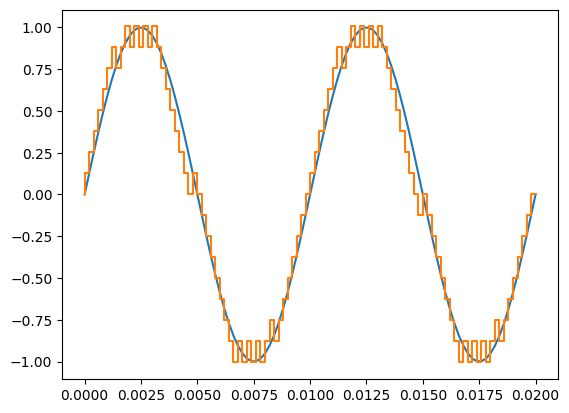

In [185]:
delta = 2*np.pi*fm*(1/fs)
print(delta)

e = np.zeros(len(ts))
eq = np.zeros(len(ts))
mq = np.zeros(len(ts))

for i in range(0,len(ts)):
    if(i == 0):
        e[i] = ys[i]
        eq[i] = delta*np.sign(e[i])
        mq[i] = eq[i]
    else:
        e[i] = ys[i] - mq[i-1]
        eq[i] = delta*np.sign(e[i])
        mq[i] = eq[i] + mq[i-1]

plt.plot(ts,ys)
plt.step(ts,mq)


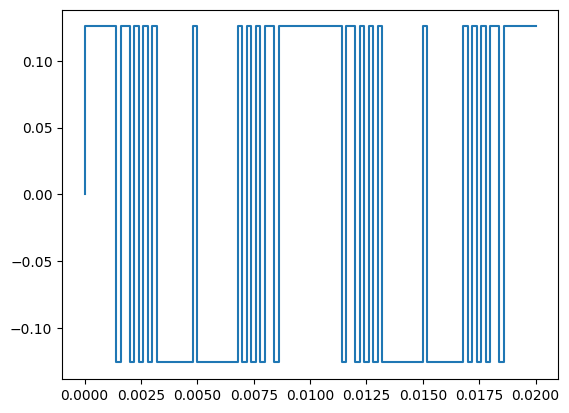

In [186]:
plt.step(ts,eq)

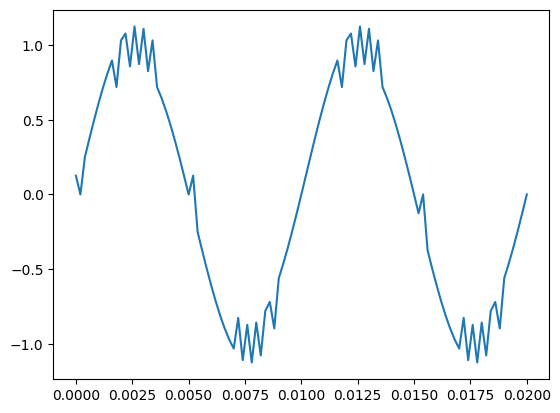

In [187]:
s_ret = []
for i in range(0,len(ts)):
    s_ret.append(e[i-1]+mq[i-1])

plt.plot(ts,s_ret)

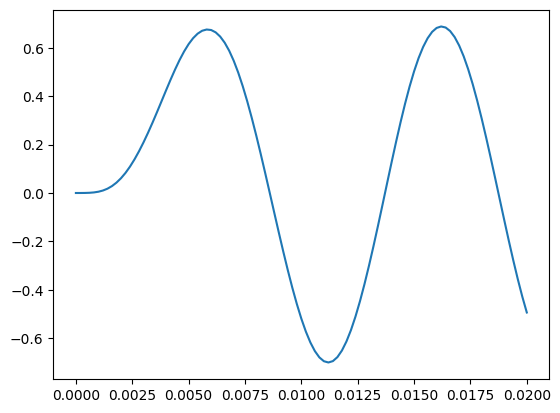

In [188]:
[b,a] = signal.butter(3,fm/(fs/2))
ret = signal.lfilter(b,a,mq)
plt.plot(ts,ret)